In [1]:
import os.path as osp
from itertools import product
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gudhi as gd
from skimage import exposure
from fl_tissue_model_tools.topology import MorseGraph
from fl_tissue_model_tools.transforms import combine_im_with_mask_dist_transform

In [2]:
def show(imgs, hw=None, figsize=None, cmap='gray', dpi=300):
    if hw is None:
        hw = (1, len(imgs))
    if figsize is None:
        fig_w = max(5, 5*hw[1])
        fig_h = max(5, 5*hw[0])
        figsize = (fig_w, fig_h)
    fig, axs = plt.subplots(*hw, figsize=figsize, dpi=dpi, constrained_layout=True)
    for i, img in enumerate(imgs):
        axs[i].imshow(img, cmap=cmap)
        axs[i].axis('off')
    plt.show()

/media/data/lab/tissue-model-analysis-tools/src/fl_tissue_model_tools/transforms.py:36: RuntimeWarning: invalid value encountered in divide
  dist_transformed = 1 - (dist_to_skeleton / (dist_to_skeleton + dist_to_border))


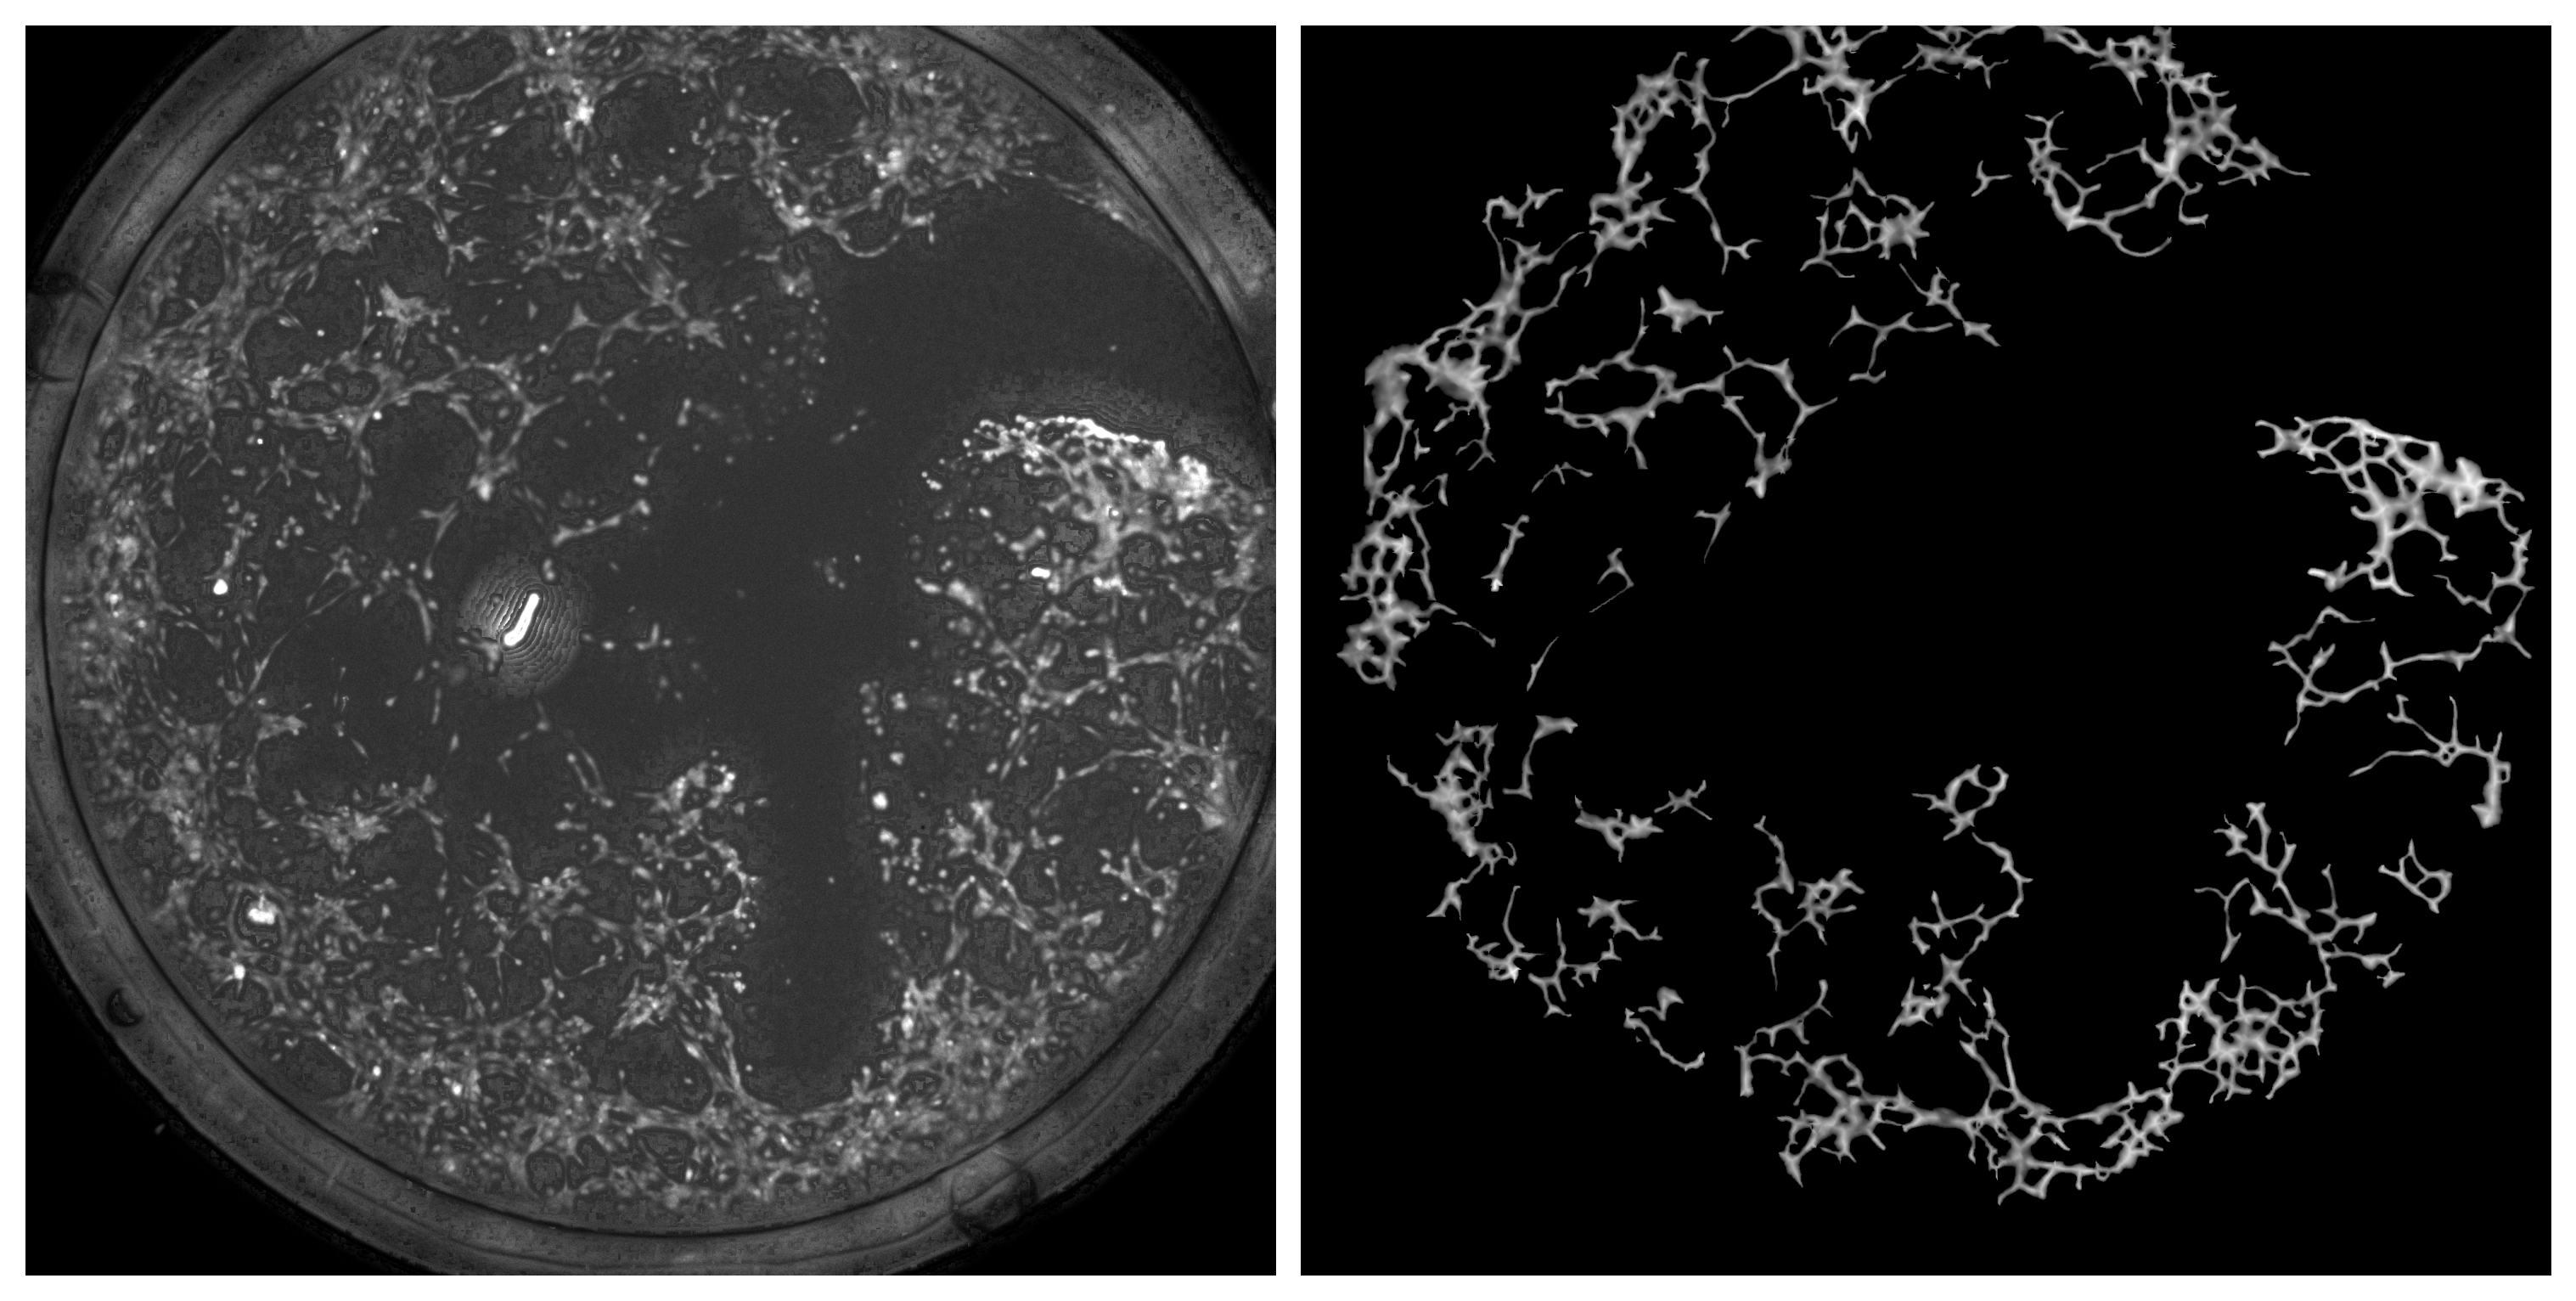

In [3]:
data_dir = "sample_data"
img_path = osp.join(data_dir, "D5_1_ZProj_002.tif")
mask_path = osp.join(data_dir, "D5_1_ZProj_002_mask.tif")
img, mask = [cv2.imread(f, 0) for f in (img_path, mask_path)]
img_original = np.copy(img)
img = exposure.equalize_adapthist(img, clip_limit=0.01)
img = img.astype(np.float32)
for i in range(10):
    img = cv2.medianBlur(img, 5)
img = combine_im_with_mask_dist_transform(img, mask, 0.5)
img = (img*256).astype(np.double)
show([img_original, img])

thresh1: 0.5, thresh2: 0


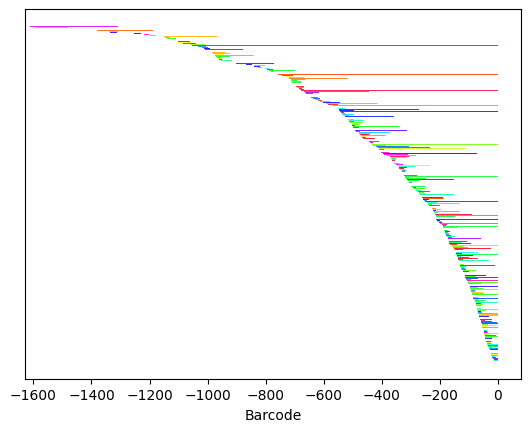

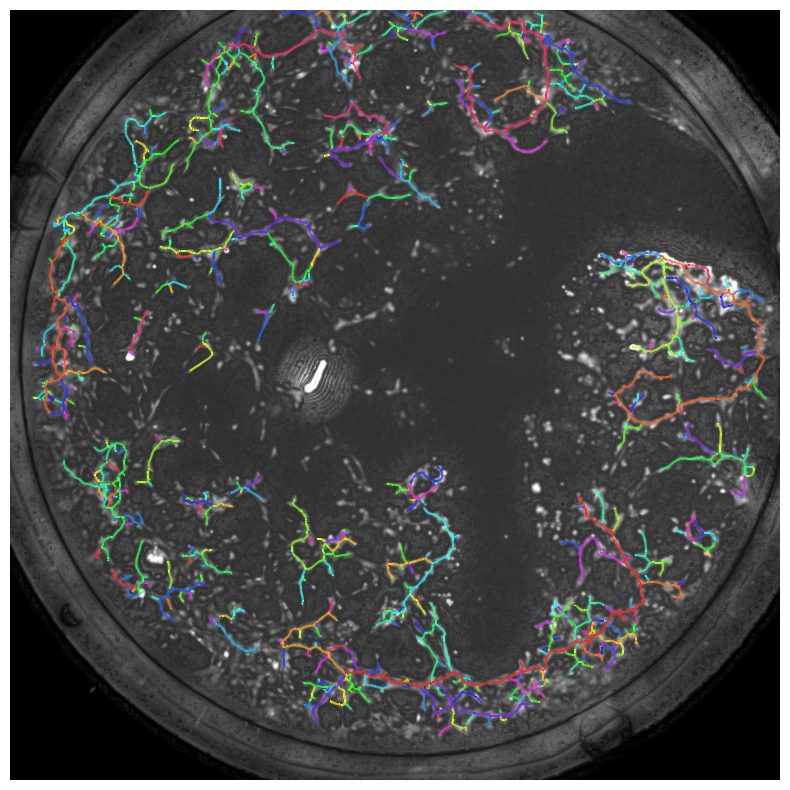

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [5]:
thresh1_choices = [0.5, 1, 2, 4, 8, 16, 32]
thresh2_choices = [0, 0.5, 1, 2, 4, 8, 16, 32]

for thresh1, thresh2 in product(thresh1_choices, thresh2_choices):
    print(f"thresh1: {thresh1}, thresh2: {thresh2}")
    morse_graph = MorseGraph(img, thresholds=(thresh1, thresh2))
    morse_graph.plot_colored_barcode()
    morse_graph = MorseGraph(img, thresholds=(thresh1, thresh2))
    plt.figure(figsize=(10, 10))
    plt.margins(0)
    ax = plt.gca()
    ax.imshow(img_original, cmap='gray')
    morse_graph.plot_colored_tree(ax=ax)
    plt.show()
    #plt.savefig(f'morse_tree_{thresh1}_{thresh2}.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
# Show the barcode
#fig, (ax1, ax2) = plt.subplots(1, 2)
#gd.plot_persistence_barcode(morse_graph.barcode, axes=ax1)
# gd.plot_persistence_barcode(filtered_barcode, axes=ax2)